In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.graphics.tsaplots as tsa_plots

In [3]:
from statsmodels.tsa.arima_model import ARIMA

In [4]:
walmart=pd.read_csv('H:\\Documents\\Walmart Footfalls Raw.csv')

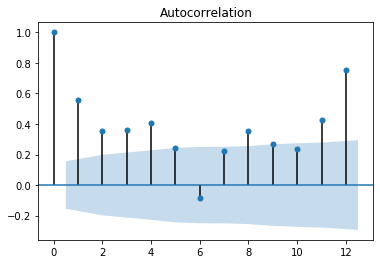

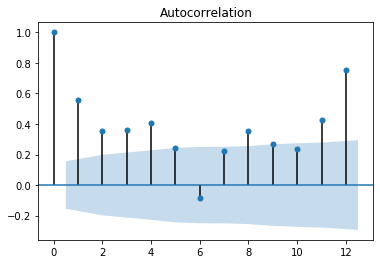

In [6]:
tsa_plots.plot_acf(walmart.Footfalls, lags=12)

In [8]:
model1=ARIMA(walmart.Footfalls, order=(1,1,6)).fit(disp=0)
model1.aic

C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1980.7636966132036

In [9]:
model2=ARIMA(walmart.Footfalls, order=(1,1,5)).fit(disp=0)
model2.aic

2000.2628728849616

In [32]:
### P=AutoRegressive(Value based on ACF plot) D=differentiate Q=Moving Avg

p=1
d=1
q=0

In [11]:
pdq=[]
aic=[]
for q in range(7):
    try:
        model=ARIMA(walmart.Footfalls, order=(p,d,q)).fit(disp=0)
        x=model.aic
        x1=p,d,q
        aic.append(x)
        pdq.append(x1)
    except:
        pass

C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [12]:
keys=pdq
values=aic
d=dict(zip(keys,values))
print(d)

{(1, 1, 0): 2063.3139358803123, (1, 1, 1): 2026.7824810969548, (1, 1, 2): 2027.1414743573353, (1, 1, 3): 2022.0307951464115, (1, 1, 4): 2010.9633703042994, (1, 1, 5): 2000.2628728849616, (1, 1, 6): 1980.7636966132036}


In [13]:
fc,se,conf=model2.forecast(12)

In [16]:
fc

array([2143.29922086, 2169.82173363, 1982.12846715, 2023.83262916,
       2073.24277734, 2050.61007657, 2064.43105613, 2059.80647407,
       2064.51534587, 2064.50149017, 2066.87733451, 2068.04399067])

In [17]:
data=pd.DataFrame({"Month":["Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]})

In [18]:
data["Footfalls"]=0

In [19]:
data["Footfalls"]=round(pd.DataFrame(fc))

In [20]:
data

,Month,Footfalls
0,Apr,2143.0
1,May,2170.0
2,Jun,1982.0
3,Jul,2024.0
4,Aug,2073.0
5,Sep,2051.0
6,Oct,2064.0
7,Nov,2060.0
8,Dec,2065.0
9,Jan,2065.0


In [34]:
model1=ARIMA(walmart.Footfalls, order=(5,1,7)).fit(disp=0)
model1.aic

C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1897.1684826775188

In [37]:
fc,se,conf=model1.forecast(12)

In [38]:
fc

array([2014.2381405 , 1996.61040737, 1929.4811751 , 2124.66126654,
       2107.13729544, 1880.07775775, 2017.3017734 , 2061.79842215,
       2118.21427604, 1919.72788698, 1942.28279004, 2164.29712668])